# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ModuleNotFoundError: No module named 'citipy'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sorong
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | saint anthony
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kurchum
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | arauco
Processing Record 8 of Set 1 | daru
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | brodina
Processing Record 12 of Set 1 | tondano
Processing Record 13 of Set 1 | labutta
City not found. Skipping...
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | trairi
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | fairv

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sorong,-0.8833,131.2500,28.93,69,81,2.53,ID,1679024003
1,cidreira,-30.1811,-50.2056,24.44,87,1,9.29,BR,1679024004
2,saint anthony,45.0205,-93.2180,-3.97,82,100,10.29,US,1679023827
3,albany,42.6001,-73.9662,1.44,77,59,1.23,US,1679023787
4,kurchum,48.5722,83.6542,0.32,96,100,1.19,KZ,1679024004


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sorong,-0.8833,131.2500,28.93,69,81,2.53,ID,1679024003
1,cidreira,-30.1811,-50.2056,24.44,87,1,9.29,BR,1679024004
2,saint anthony,45.0205,-93.2180,-3.97,82,100,10.29,US,1679023827
3,albany,42.6001,-73.9662,1.44,77,59,1.23,US,1679023787
4,kurchum,48.5722,83.6542,0.32,96,100,1.19,KZ,1679024004


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

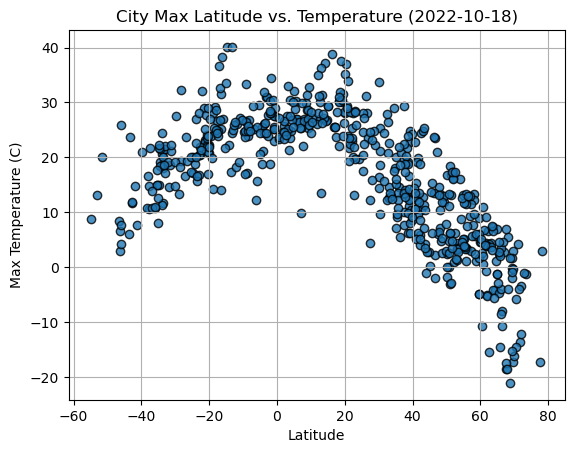

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

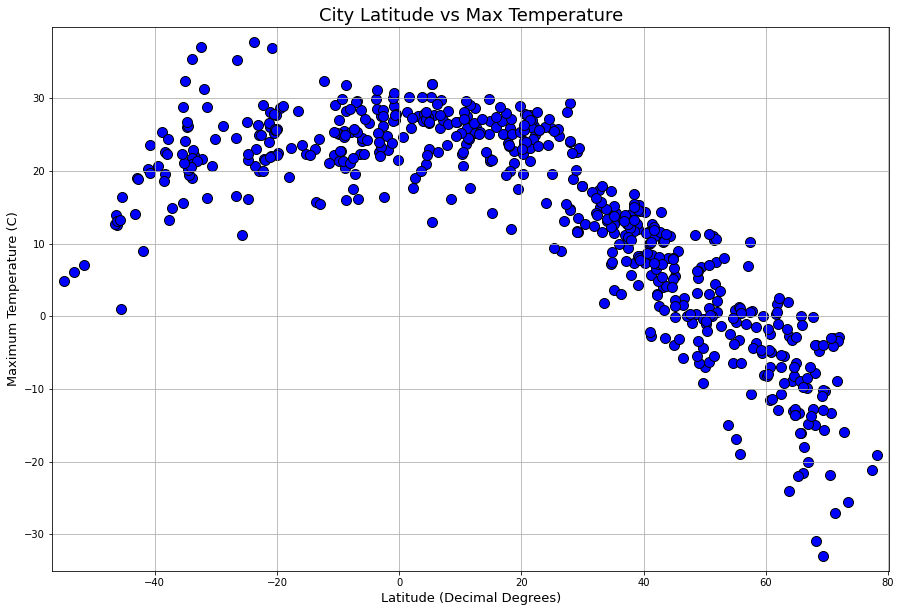

In [22]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Max Temp", figsize=(15, 10), edgecolor="black", color="blue", s=100)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Max Temperature", fontsize=18)
plt.xlabel("Latitude (Decimal Degrees)", fontsize=13)
plt.ylabel("Maximum Temperature (C)", fontsize=13)
plt.xlim(min(city_data_df["Lat"])-2, max(city_data_df["Lat"])+2)
plt.ylim(min(city_data_df["Max Temp"])-2, max(city_data_df["Max Temp"])+2)
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

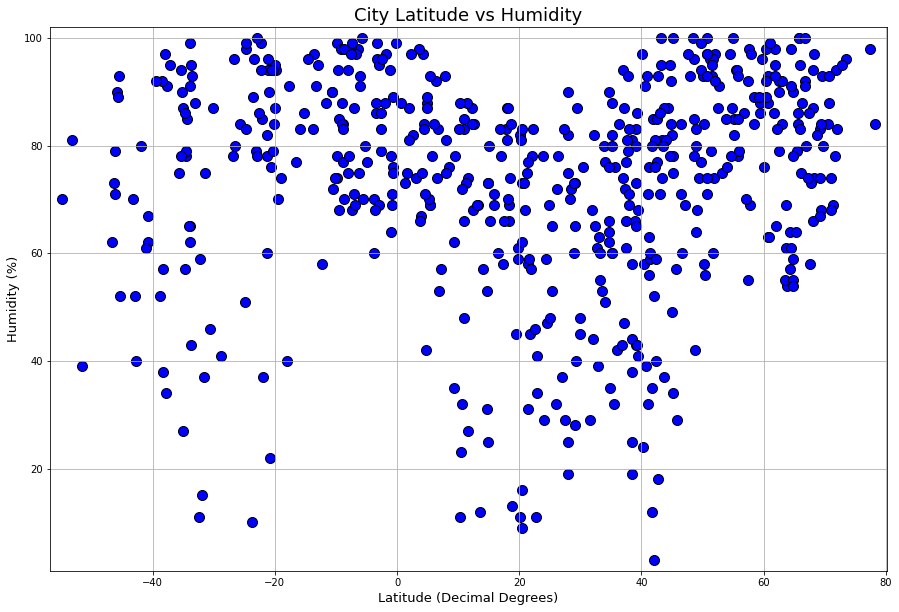

In [23]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Humidity", figsize=(15, 10), color="blue", edgecolor="black", s=100)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity", fontsize=18)
plt.xlabel("Latitude (Decimal Degrees)", fontsize=13)
plt.ylabel("Humidity (%)", fontsize=13)
plt.xlim(min(city_data_df["Lat"])-2, max(city_data_df["Lat"])+2)
plt.ylim(min(city_data_df["Humidity"])-2, max(city_data_df["Humidity"])+2)
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

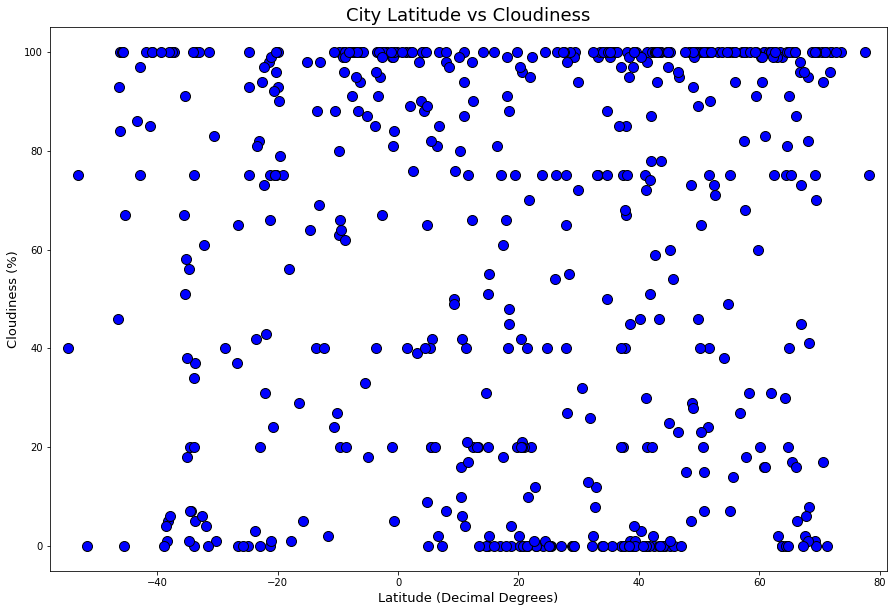

In [24]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Cloudiness", figsize=(15, 10), edgecolor="black", color="blue", s=100)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Cloudiness", fontsize=18)
plt.xlabel("Latitude (Decimal Degrees)", fontsize=13)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.xlim(min(city_data_df["Lat"])-3, max(city_data_df["Lat"])+3)
plt.ylim(min(city_data_df["Cloudiness"])-5, max(city_data_df["Cloudiness"])+5)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, y_label, val1, val2):
    plt.scatter(x_values,y_values)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    plt.grid(True)
  
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(val1,val2),fontsize=13,color="red")

    
    print(f"The r-value is: {rvalue**2}")

    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saint anthony,45.0205,-93.2180,-3.97,82,100,10.29,US,1679023827
3,albany,42.6001,-73.9662,1.44,77,59,1.23,US,1679023787
4,kurchum,48.5722,83.6542,0.32,96,100,1.19,KZ,1679024004
8,la ronge,55.1001,-105.2842,-16.86,85,75,0.00,CA,1679024006
9,iqaluit,63.7506,-68.5145,-24.06,69,0,10.80,CA,1679024006


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sorong,-0.8833,131.2500,28.93,69,81,2.53,ID,1679024003
1,cidreira,-30.1811,-50.2056,24.44,87,1,9.29,BR,1679024004
5,puerto ayora,-0.7393,-90.3518,26.97,89,5,0.89,EC,1679024005
6,arauco,-37.2463,-73.3175,14.92,95,100,1.38,CL,1679024005
7,daru,-9.0763,143.2092,25.51,88,100,3.37,PG,1679024005


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8342435495273997


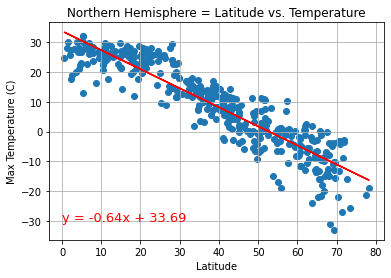

In [52]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
title = 'Northern Hemisphere = Latitude vs. Temperature'
y_label = 'Max Temperature (C)'
val1 = 0
val2 = -30
linear_regression(x_values, y_values, title, y_label, val1, val2)

The r-value is: 0.23316050508495142


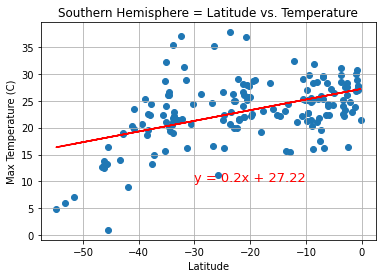

In [53]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
title = 'Southern Hemisphere = Latitude vs. Temperature'
y_label = 'Max Temperature (C)'
val1 = -30
val2 = 10


linear_regression(x_values, y_values, title, y_label, val1, val2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07960007058989138


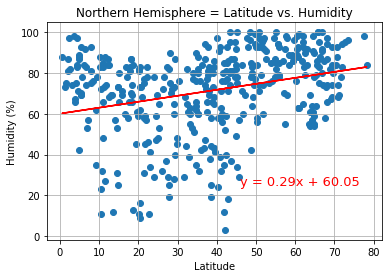

In [54]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
title = 'Northern Hemisphere = Latitude vs. Humidity'
y_label = 'Humidity (%)'
val1 = 46
val2 = 25


linear_regression(x_values, y_values, title, y_label, val1, val2)

The r-value is: 0.08847684358025794


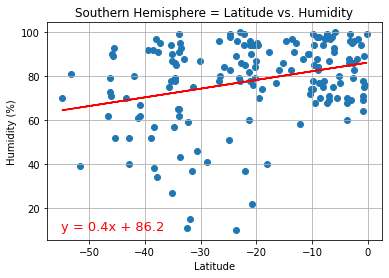

In [55]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = 'Southern Hemisphere = Latitude vs. Humidity'
y_label = 'Humidity (%)'
val1 = -55
val2 = 10


linear_regression(x_values, y_values, title, y_label, val1, val2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02692968166404345


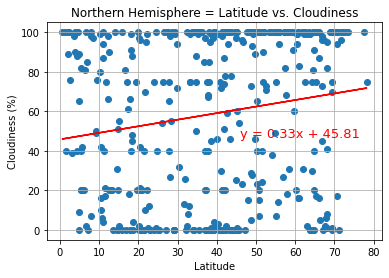

In [56]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = 'Northern Hemisphere = Latitude vs. Cloudiness'
y_label = 'Cloudiness (%)'
val1 = 46
val2 = 47


linear_regression(x_values, y_values, title, y_label, val1, val2)

The r-value is: 0.0850892516404168


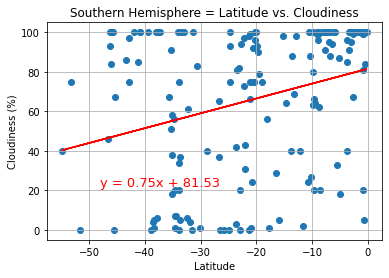

In [57]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
title = 'Southern Hemisphere = Latitude vs. Cloudiness'
y_label = 'Cloudiness (%)'
val1 = -48
val2 = 22


linear_regression(x_values, y_values, title, y_label, val1, val2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


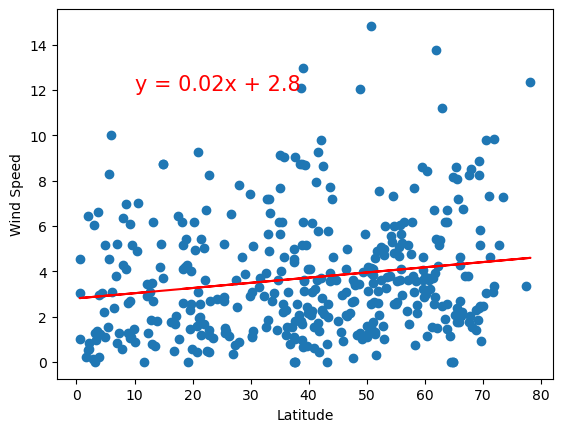

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.021259887756915088


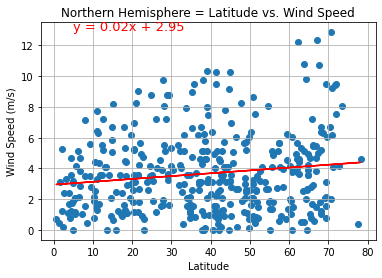

In [58]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = 'Northern Hemisphere = Latitude vs. Wind Speed'
y_label = 'Wind Speed (m/s)'
val1 = 5
val2 = 13


linear_regression(x_values, y_values, title, y_label, val1, val2)

**Discussion about the linear relationship:** 
We can see that the winds are high in the north hemisfere
    
    